In [1]:
%matplotlib inline  

import os
import re
import numpy as np
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import json
from result_parser import get_exp_result
from utils.distribution import distr_profile


#fig_width = 10
#plt.rcParams["figure.figsize"] = (fig_width, 6)
#plt.rcParams["figure.figsize"] = (20, 6)
#plt.rcParams['font.size'] = 20



Bad key text.latex.preview in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
result_dict={
    'acc':{
        'fname':'acc_test_by_cls.csv',
        'ylabel':'Accuracy (%)'
    },
    'loss':{
        'fname':'loss_test_by_cls.csv',
        'ylabel':'Average Loss'
    }
}
def plt_tbc(base_dir, result_folder, algos):
    
    for algo_f, algo_lab in algos.items():
        for result in ['acc', 'loss']:
            result_config = result_dict[result]
            path = os.path.join(base_dir, result_folder, algo_f, result_config['fname'])
            raw_tbc = np.genfromtxt(path, delimiter=',') # dim: n_epoch x n_class
            sampled_ep = range(49, raw_tbc.shape[0], 50)
            sampled_tbc = raw_tbc[sampled_ep, :]
            tbc = sampled_tbc.T
            #fig, ax = plt.subplots(figsize=(16*fig_zoom, 9*fig_zoom))
            fig, ax = plt.subplots()

            '''
            Heatmap
            '''
            #ax.plot(tbc[])
            ax.matshow(tbc)
            for (i, j), z in np.ndenumerate(tbc):
                ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
            ax.set_title(' '.join([base_dir, '\n', result_folder,algo_lab, result_config['fname']]))
            ax.set_ylabel('Class')
            #ax.set_ylabel(result_config['ylabel'])
            #ax.set_xticks(sampled_ep)
            ax.set_xticks(range(0, len(sampled_ep)), range(50, raw_tbc.shape[0]+1, 50))
            #ax.set_xticks(range(0, len(sampled_ep), 2), range(0, raw_tbc.shape[0], 100))
            ax.xaxis.set_ticks_position('bottom')
            ax.set_xlabel('Epoch')
            
            #ax.set_ylim(result_dict['ylim'])
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            #ax.legend(fontsize=8, ncol=int(len(algos)/2), frameon=False)

In [3]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

def plt_tbc_box_overcls(base_dir, result_folder, algos):
    for result in ['acc', 'loss']:
        fig, ax = plt.subplots()
        boxes = [None]*len(algos)
        #colors = ['#D7191C', '#2C7BB6', '#112233']
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
        for aidx, (algo_f, algo_lab) in enumerate(algos.items()):
            result_config = result_dict[result]
            path = os.path.join(base_dir, result_folder, algo_f, result_config['fname'])
            raw_tbc = np.genfromtxt(path, delimiter=',') # dim: n_epoch x n_class
            sampled_ep = range(49, raw_tbc.shape[0], 50)
            sampled_tbc = raw_tbc[sampled_ep, :]
            tbc = sampled_tbc.T
            #fig, ax = plt.subplots(figsize=(16*fig_zoom, 9*fig_zoom))

            '''
            Boxplot
            '''
            boxes[aidx] = ax.boxplot(tbc, positions=np.arange(len(tbc))+(aidx-1)*0.3, sym='', widths=0.2)
            set_box_color(boxes[aidx], colors[aidx]) 
            plt.plot([], c=colors[aidx], label=algo_lab)
            
        ax.set_ylabel(result_config['ylabel'])
        ax.set_xticks(range(0, len(sampled_ep)), range(50, raw_tbc.shape[0]+1, 50))
        ax.set_xlabel('Epoch')

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.legend(fontsize=8, ncol=int(len(algos)/2), frameon=False)

def plt_tbc_box_overcls(base_dir, result_folder, algos):
    for result in ['acc', 'loss']:
        #fig, ax = plt.subplots()
        fig, ax = plt.subplots(figsize=(16*fig_zoom, 9*fig_zoom))
        
        boxes = [None]*len(algos)
        #colors = ['#D7191C', '#2C7BB6', '#112233']
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
        for aidx, (algo_f, algo_lab) in enumerate(algos.items()):
            result_config = result_dict[result]
            path = os.path.join(base_dir, result_folder, algo_f, result_config['fname'])
            raw_tbc = np.genfromtxt(path, delimiter=',') # dim: n_epoch x n_class
            sampled_ep = range(49, raw_tbc.shape[0], 50)
            sampled_tbc = raw_tbc[sampled_ep, :]
            tbc = sampled_tbc.T

            '''
            Boxplot
            '''
            boxes[aidx] = ax.boxplot(tbc, positions=np.arange(len(tbc))+(aidx-1)*0.3, sym='', widths=0.2)
            set_box_color(boxes[aidx], colors[aidx]) 
            plt.plot([], c=colors[aidx], label=algo_lab)
            
        ax.set_ylabel(result_config['ylabel'])
        ax.set_xticks(range(0, len(sampled_ep)), range(50, raw_tbc.shape[0]+1, 50))
        ax.set_xlabel('Epoch')

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.legend(fontsize=8, ncol=int(len(algos)/2), frameon=False)
            

def plt_tbc_box_overepc(base_dir, result_folders, algos, lbalan):
    for result in ['acc', 'loss']:
        fig, ax = plt.subplots()
        #fig, ax = plt.subplots(figsize=(16*fig_zoom, 9*fig_zoom))
        
        boxes = [None]*len(algos)
        #colors = ['#D7191C', '#2C7BB6', '#112233']
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
        for aidx, (algo_f, algo_lab) in enumerate(algos.items()):
            result_config = result_dict[result]
            avg_raw_tbc = None
            for ridx, result_folder in enumerate(result_folders):
                path = os.path.join(base_dir, result_folder, algo_f, result_config['fname'])
                raw_tbc = np.genfromtxt(path, delimiter=',') # dim: n_epoch x n_class
                if ridx == 0:
                    avg_raw_tbc = raw_tbc.copy()
                else:
                    avg_raw_tbc += raw_tbc
            '''
            down sample test period
            '''
            avg_raw_tbc /= len(result_folders)
            #sampled_ep = range(avg_raw_tbc.shape[0]) # no sampling
            #sampled_ep = range(199, avg_raw_tbc.shape[0]-150)
            sampled_ep = range(199, avg_raw_tbc.shape[0], 50)
            #sampled_ep = range(199, avg_raw_tbc.shape[0]-150, 50)
            #sampled_ep = range(9, avg_raw_tbc.shape[0], 10)
            #sampled_ep = range(199, avg_raw_tbc.shape[0]-150, 10)
            sampled_tbc = avg_raw_tbc[sampled_ep, :]
            tbc = sampled_tbc

            '''
            Boxplot
            '''
            #fig, ax = plt.subplots(figsize=(16*fig_zoom, 9*fig_zoom))
            boxes[aidx] = ax.boxplot(tbc, positions=np.arange(tbc.shape[1])+(aidx-1)*0.2, sym='', widths=0.15)
            set_box_color(boxes[aidx], colors[aidx]) 
            plt.plot([], c=colors[aidx], label=algo_lab)
            
        ax.set_ylabel(result_config['ylabel'])
        ax.set_xticks(range(raw_tbc.shape[1]), range(raw_tbc.shape[1]))
        ax.set_xlabel('Class')

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.legend(fontsize=8, ncol=int(len(algos)/2), frameon=False)
        
        fig.tight_layout()
        fig_name = '{}_{}_{}_vi{}'.format(result, data_distr, lbalan, VI)
        fig_dir = os.path.join('..', 'save', 'cifar10', 'fig', 'test_by_class')
        os.makedirs(fig_dir, mode = 0o777, exist_ok = True) 
        fig_path = os.path.join(fig_dir, fig_name)
        
        fig.savefig('{}.{}'.format(fig_path, 'png'), format='png', transparent=True)
        fig.savefig('{}.{}'.format(fig_path, 'eps'), format='eps', transparent=True)


=== cifar10 - tbc_zipf_vi3_r0 - shard10 - select100*0.1 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']
['FedAvg', 'Oort', 'Fedcism']

bacc summary: [51.94, 59.22, 59.95] -> max: 59.22
target_acc: 56.25900, 95% of bacc 

required epoch
[-1, 309, 277]
['-309.00x', '1.00x', '1.12x']
['FedAvg', 'Oort', 'Fedcism']
required time_simu
[-1, 1938.0, 1718.0]
['-1938.00x', '1.00x', '1.13x']
['FedAvg', 'Oort', 'Fedcism']

=== cifar10 - tbc_zipf_vi3_r0 - shard10 - select100*0.05 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']
['FedAvg', 'Oort', 'Fedcism']

bacc summary: [52.79, 56.36, 56.69] -> max: 56.36
target_acc: 53.54200, 95% of bacc 

required epoch
[-1, 304, 303]
['-304.00x', '1.00x', '1.00x']
['FedAvg', 'Oort', 'Fedcism']
required time_simu
[-1, 1652.0, 1667.0]
['-1667.00x', '1.01x', '1.00x']
['FedAvg', 'Oort', 'Fedcism']

=== cifar10 - tbc_zipf_vi3_r0 - shard2 - select100*0.1 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']
['FedAvg', 'Oo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


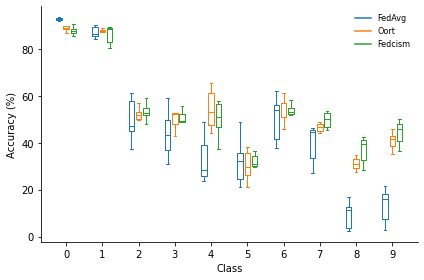

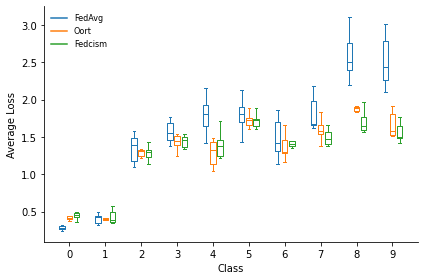

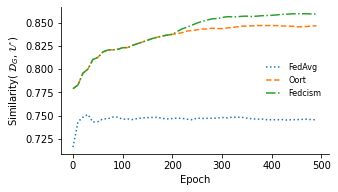

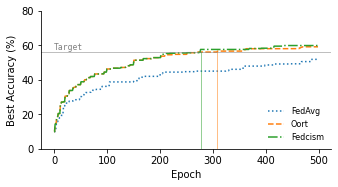

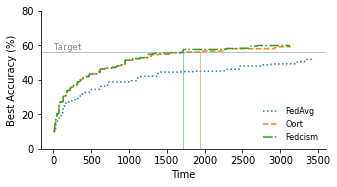

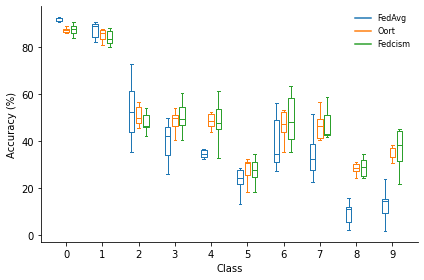

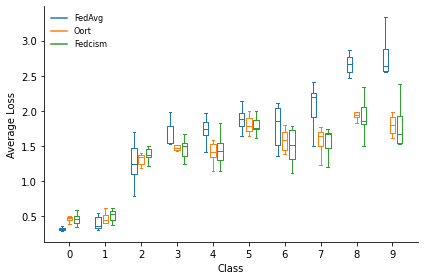

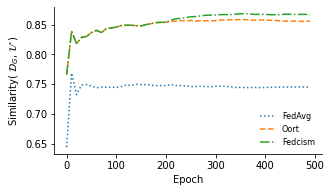

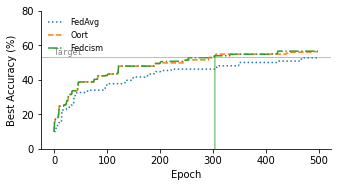

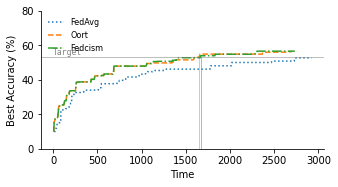

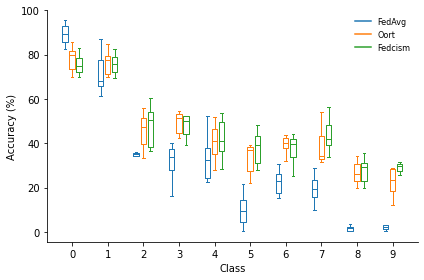

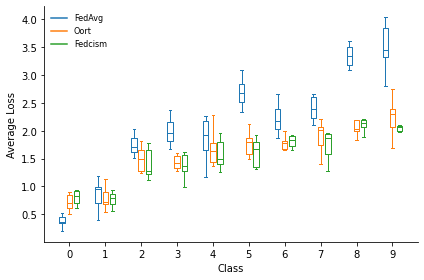

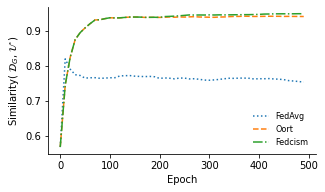

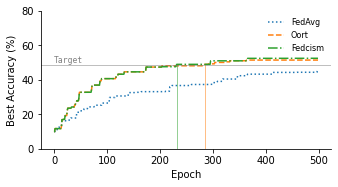

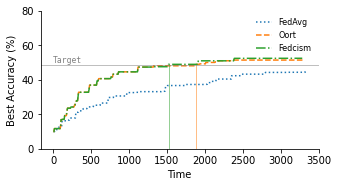

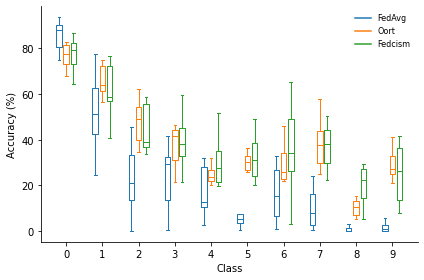

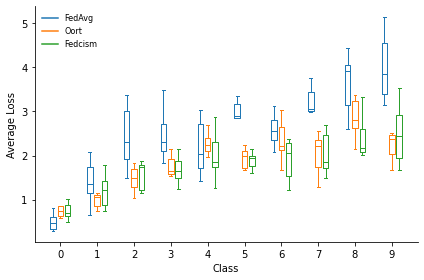

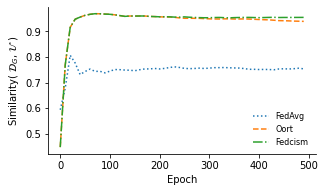

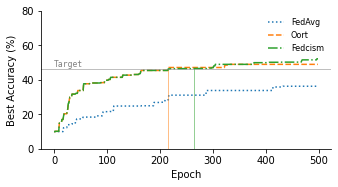

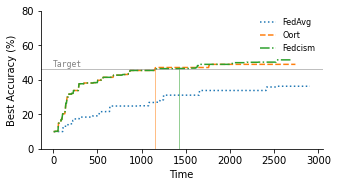

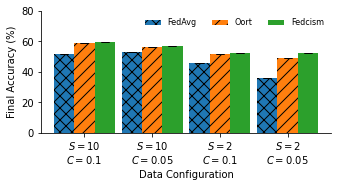

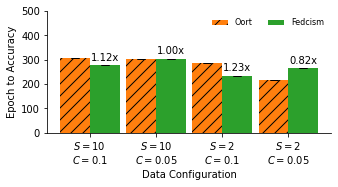

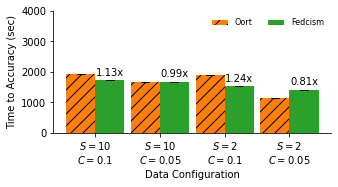

In [4]:
data_distr = 'zipf' # zipf, htail, gbalan, sparsez
VI = 3
epoch = 500
fig_zoom = 0.3

# compare over datasets
acc_threshold = 95
metrics = {'ACC':[], 'ETA':[], 'TTA':[]}
x_labels = []
y_labels = ['Final Accuracy (%)',
            'Epoch to Accuracy',
            'Time to Accuracy (sec)']
y_lim = [80, epoch, 4000]
'''
y_labels = ['Final Accuracy (%)',
            'Epoch to Reach {}% Best Acc'.format(acc_threshold),
            'Time to Reach {}% Best Acc'.format(acc_threshold)]
'''
legends = {'fedavg':'FedAvg', 'oort_e0.8':'Oort', 'algo3_deg1_e0.8_wof100':'Fedcism'}
textures = ['xx', '//', None]

for dataset in ['cifar10']:
    for shard_per_user in [10, 2]:
        for frac in [0.1, 0.05]:
            x_labels.append('$S={}$\n$C={}$'.format(shard_per_user, frac))
            bacc_stack = []
            TTAe_stack = []
            TTAt_stack = []
            base_dir = '../save/{}/{}_iid{}_num{}_C{}_le{}/shard{}/'.format(
                    dataset, 'cnn', 'False', 100, frac, 1, shard_per_user)
            
            result_folders = ['tbc_{}_vi{}_r{}'.format(data_distr, VI, RUN) for RUN in range(3)]
            
            for RUN in range(1):
        
                data_distr_file = '{}_dict_users_vi{}_r{}.pkl'.format(data_distr, VI, RUN)
                result_folder = 'tbc_{}_vi{}_r{}'.format(data_distr, VI, RUN)
                
                #plt_tbc(base_dir, result_folder, legends)
                #plt_tbc_box_overcls(base_dir, result_folder, legends)
                plt_tbc_box_overepc(base_dir, result_folders, legends, 's{}_c{}'.format(shard_per_user, frac))
                '''if frac == 0.1:
                    dpath = 'save/{}/data_distr/num100/shard{}/{}'.format(dataset, shard_per_user, data_distr_file)
                    profile = distr_profile(dpath)
                    _ =profile.plot_local_distr(shard_per_user)
    '''
                algos, color_algos, bacc_algos, required_time,_ = get_exp_result(
                    dataset, data_distr, VI, RUN, data_distr_file, result_folder, legends,
                    shard_per_user, frac, acc_threshold, show_fig=True, save=False)

                bacc_stack.append(bacc_algos)
                TTAe_stack.append(required_time['epoch'])
                TTAt_stack.append(required_time['time_simu'])
            
            metrics['ACC'].append(bacc_stack)
            metrics['ETA'].append(TTAe_stack)
            metrics['TTA'].append(TTAt_stack)
    
    print(color_algos)
    # summary 
    x = np.arange(len(x_labels))
    for i, (k, v) in enumerate(metrics.items()):
        fig, ax = plt.subplots(figsize=(16*fig_zoom, 9*fig_zoom))
        #plt.title('{} - {} - vi{}'.format(dataset, data_distr, VI), y=1.1)
        if data_distr == 'cus': # alias
            fig_name = '{}_{}_vi{}'.format(k, 'sparsez', VI)
        else:            
            fig_name = '{}_{}_vi{}'.format(k, data_distr, VI)
        fig_path = os.path.join('..', 'save', dataset, 'fig', fig_name)
        
        cur_algos = algos
        cur_v_T = v_T = np.array(v).T
        if 'TA' in k:
            cur_algos = algos[1:]
            cur_v_T = v_T[1:] # [algo][run][data_config]
        for aidx, algo in enumerate(cur_algos):
            w = 0.9/len(cur_algos)
            y_avg = cur_v_T[aidx].mean(axis=0)
            y_max = cur_v_T[aidx].max(axis=0)
            y_min = cur_v_T[aidx].min(axis=0)
            y_err = np.vstack((y_max-y_avg, y_avg-y_min))
            
            if k == 'ACC':
                p = ax.bar(x+aidx*w-0.45+w/2, y_avg, yerr=y_err, 
                            label=legends[algo], width=w,
                            capsize=4, hatch=textures[aidx])
            else:
                p = ax.bar(x+aidx*w-0.45+w/2, y_avg, yerr=y_err, 
                            label=legends[algo], width=w, color=color_algos[aidx+1],
                            capsize=4, hatch=textures[aidx+1])
                
                if aidx == 0:
                    base_yavg = y_avg
                elif aidx == 1:
                    txt = ['{:.2f}x'.format(x) for x in base_yavg/y_avg]
                    ax.bar_label(p, labels=txt, padding=3)

        ax.set_ylabel(y_labels[i])
        ax.set_xlabel('Data Configuration')
        ax.set_ylim(top=y_lim[i])
        ax.set_xticks(x, labels=x_labels)#, rotation='vertical')
        #fig.legend(fancybox=True, shadow=True, fontsize=16,
        #                      loc='lower left', bbox_to_anchor=(1, 0))
        ax.legend(fontsize=8, ncol=len(cur_algos), frameon=False)

        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
        fig.tight_layout()
        #fig.savefig('{}.{}'.format(fig_path, 'png'), format='png', transparent=True)
        #fig.savefig('{}.{}'.format(fig_path, 'eps'), format='eps', transparent=True)